In [363]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import csv

import pandas as pd

sns.set_context('paper', font_scale=2.5)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'
palette = sns.color_palette("Set2", 10)

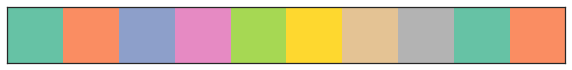

In [308]:
sns.palplot(palette)

In [358]:
num_nodes = [1, 2, 4, 8, 12, 28]
data = [[]]*len(num_nodes)
times = []
for i, node in enumerate(num_nodes):
    with open('time_exps/times_mpi_' + str(node) + '_13_15_61_60.csv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            data[i].append(row)
        times.append(np.array([float(x) for x in data[i][-1]]))
keys = [
    'only MPI', 
    'preparing to SCATTER conv+rad', 'SCATTER conv+rad', 'GATHER conv+rad', 
    'preparing to SCATTER local', 'SCATTER local', 'GATHER local',
    'conv', 'radial', 'local',
    'write to file', 'data update',
    'total', 'total (check sum)'
    ]

In [388]:
pd.DataFrame({'SpeedUp': speedup}, index=num_nodes)

,SpeedUp
1,1.000000
2,2.019298
4,3.411714
8,7.250285
12,9.487678
28,14.428455


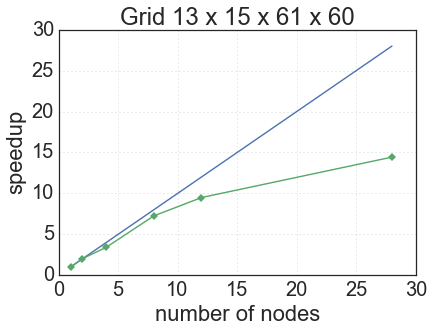

In [360]:
key = 'only MPI'

speedup = []
ind = keys.index(key)
for node in range(len(num_nodes)):
    speedup.append(times[0][ind]/times[node][ind])
    

plt.plot([1, 28], [1, 28])
plt.plot(num_nodes, speedup, 'D-')
plt.xlabel("number of nodes")
plt.ylabel("speedup")
plt.title('Grid 13 x 15 x 61 x 60')
plt.grid(ls=":")

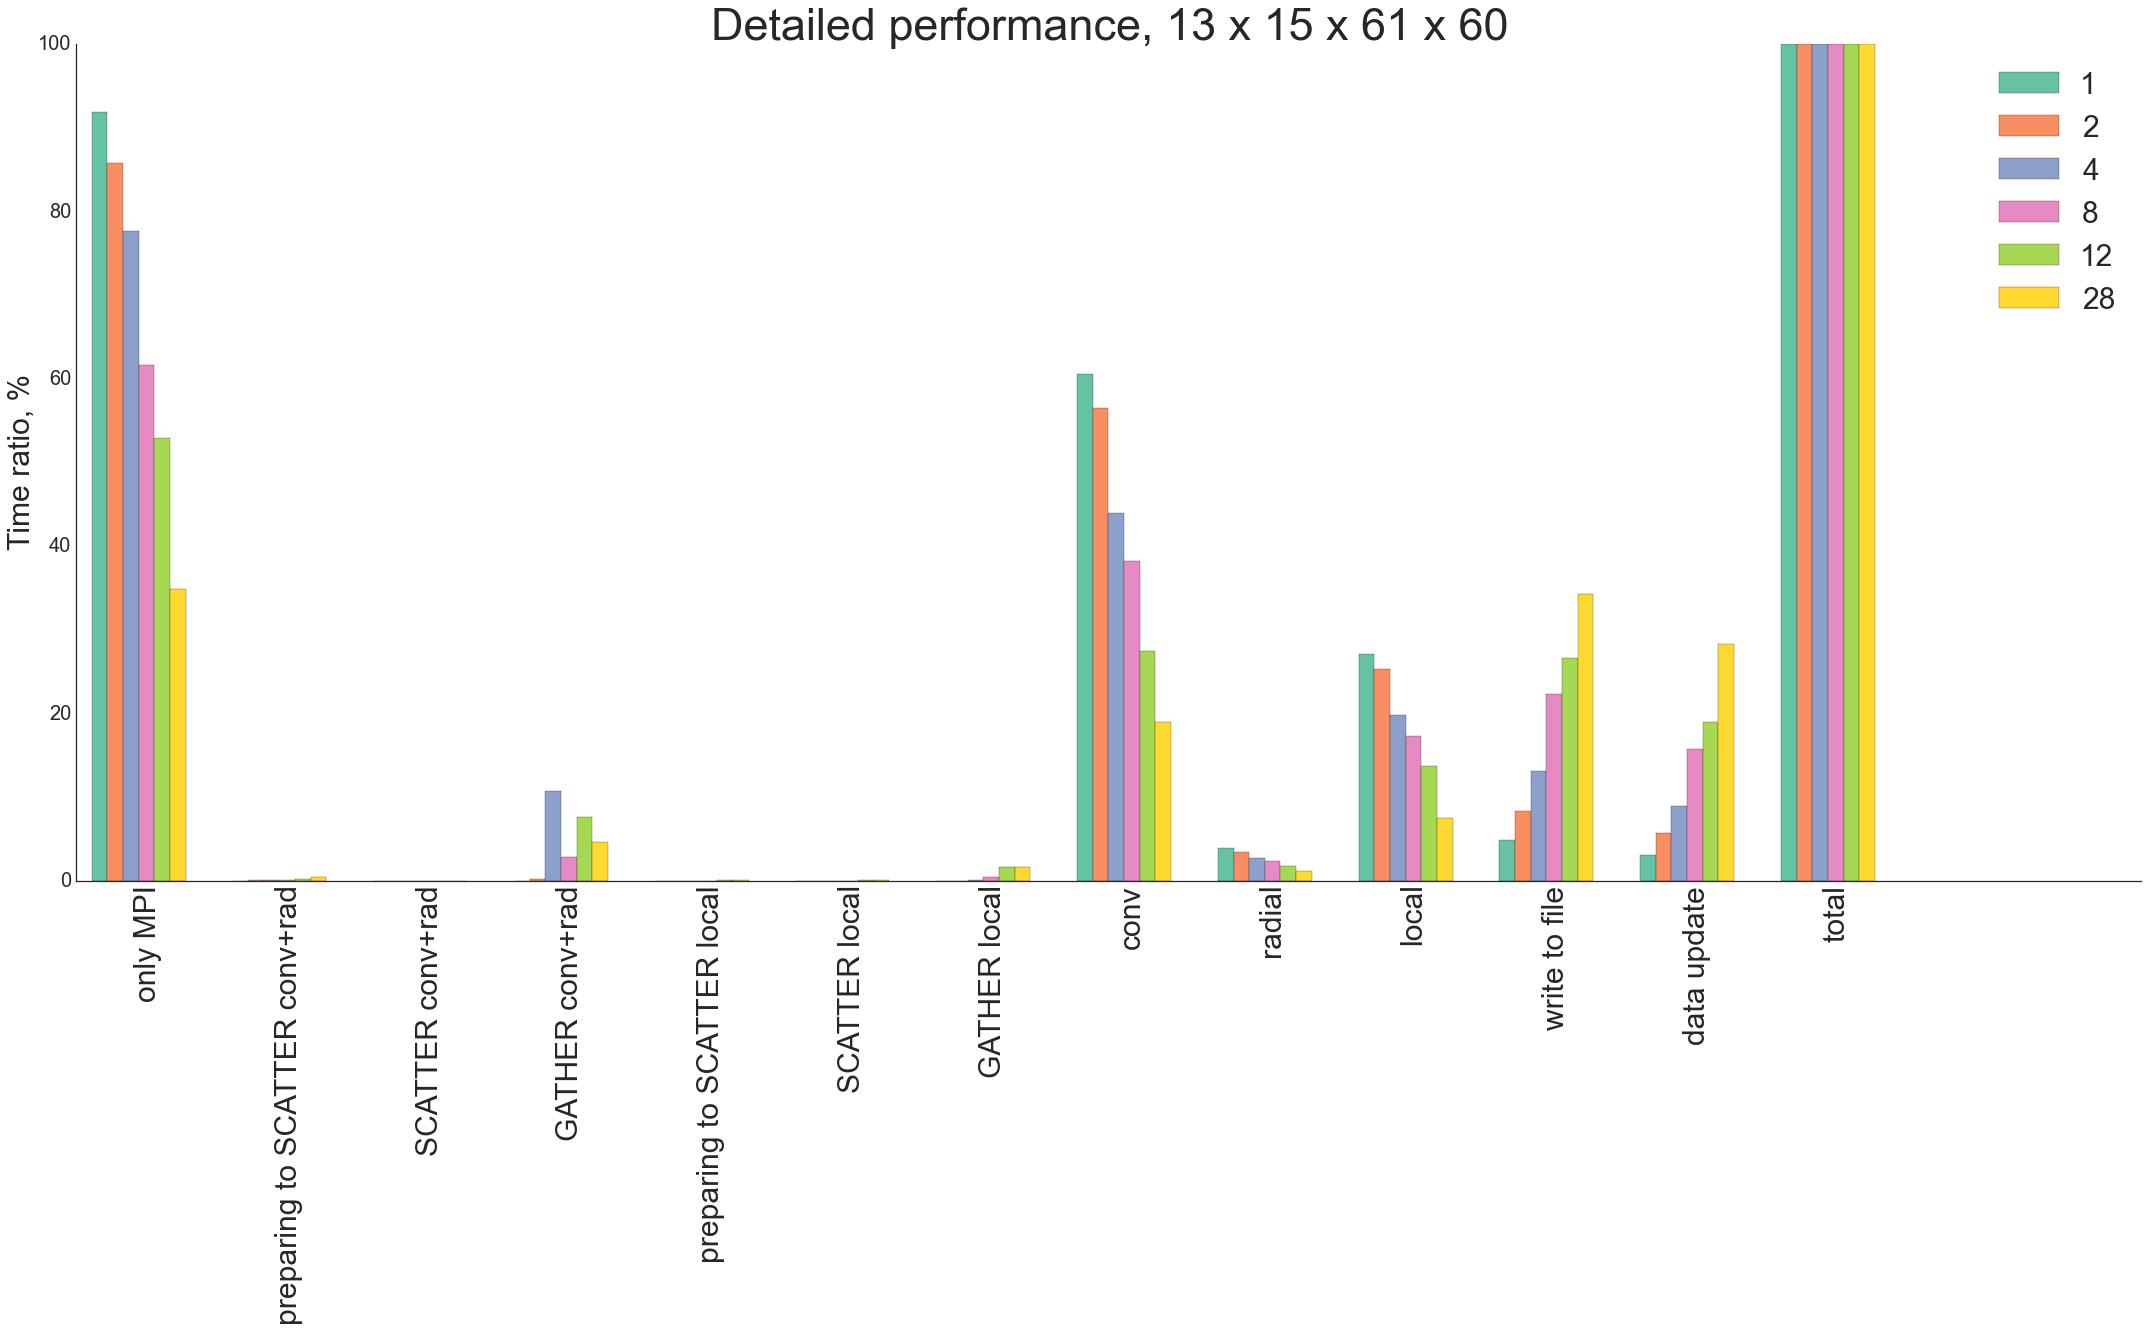

In [396]:
fig = plt.figure(figsize=(37, 15))
ax = fig.add_subplot(111)

width = 1./9
ind = np.arange(len(keys[:-1]))

for i, node in enumerate(num_nodes):
    ax.bar(ind + i*width, 100*times[i][:-1]/times[i][:-1][-1], width, color=palette[i], label=str(node))

font_size = 30

xtickNames = ax.set_xticklabels(keys[:-1], size=font_size)
plt.setp(xtickNames, rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xticks(ind + 0.4)
ax.set_xlim(-width, len(ind) + len(keys)*width)
ax.set_ylabel('Time ratio, %', size=font_size)
ax.set_title('Detailed performance, 13 x 15 x 61 x 60', size=45)
#ax.set_yscale('log')
ax.legend(loc='best', fontsize=font_size)

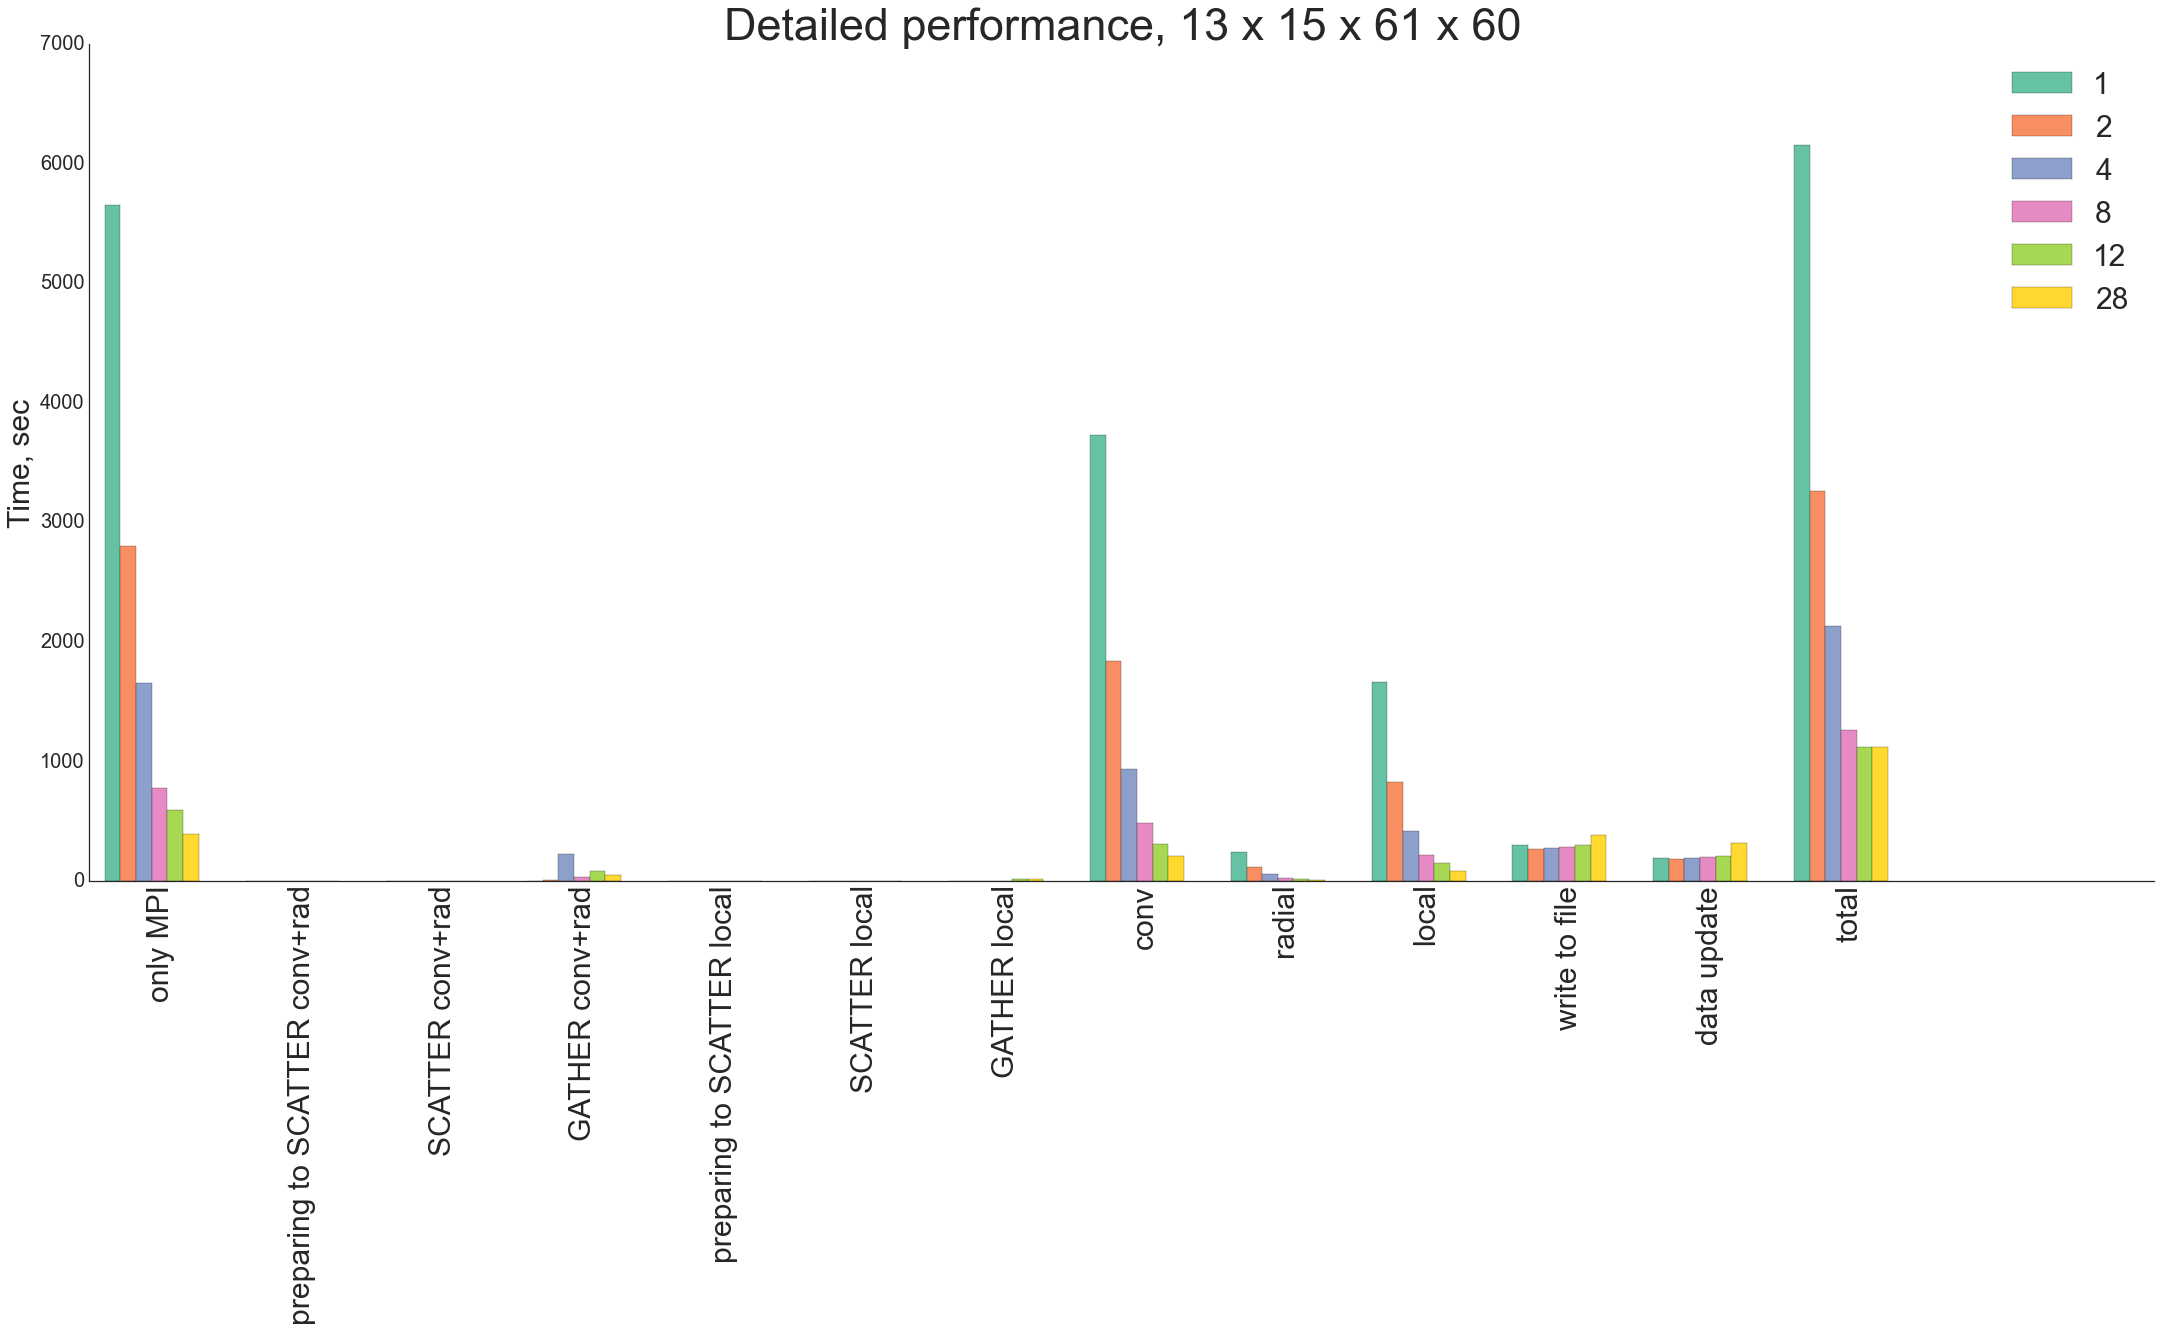

In [389]:
fig = plt.figure(figsize=(37, 15))
ax = fig.add_subplot(111)
import matplotlib
matplotlib.rcParams.update({'font.size': 30})

width = 1./9
ind = np.arange(len(keys[:-1]))

for i, node in enumerate(num_nodes):
    ax.bar(ind + i*width, times[i][:-1], width, color=palette[i], label=str(node))

font_size = 30

xtickNames = ax.set_xticklabels(keys[:-1], size=font_size)
plt.setp(xtickNames, rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xticks(ind + 0.4)
ax.set_xlim(-width, len(ind) + len(keys)*width)
ax.set_ylabel('Time, sec', size=font_size)
ax.set_title('Detailed performance, 13 x 15 x 61 x 60', size=45)
#ax.set_yscale('log')
ax.legend(loc='best', fontsize=font_size)